<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


In [ ]:
Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
Question 7 - Sharing your Assignment Notebook - 2 Points

<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23907 sha256=49aae3faa9119eb37cc8e115e95ea00020e86ba69c1dc571b1a463e15a9c71d7
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=5f397c7fb0f0f2fc798deace9c7a26abaef7641a4822273803adbd980a38e650
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=ca8cc13d7a1e2cf5ed756a2a7bce8228d36ec92f87e82c2b59aedffce91ae7a4
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tsla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tsla_info = tsla.info
tesla_data = tsla.history(period='max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-08-09,710.169983,719.030029,705.130005,713.760010,14715300,0,0.0
2021-08-10,713.989990,716.590027,701.880005,709.989990,13432300,0,0.0
2021-08-11,712.710022,715.179993,704.210022,707.820007,9800600,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


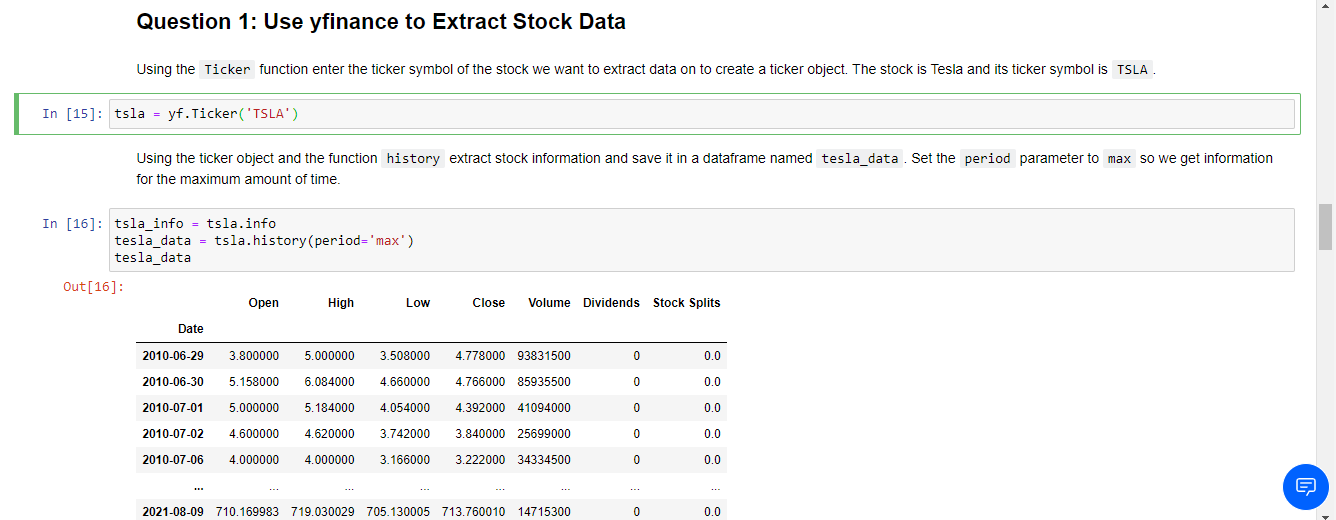

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [24]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [12]:
soup = BeautifulSoup(html_data, 'html5lib')

In [23]:
soup.find('table')

<table class="historical_data_table table">
				<thead>
				  <tr>
					<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
				  </tr>
				</thead>					
				<tbody>
								
												
				<tr>
					<td style="text-align:center">2020</td>
				
				
				
										<td style="text-align:center">$31,536</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2019</td>
				
				
				
										<td style="text-align:center">$24,578</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2018</td>
				
				
				
										<td style="text-align:center">$21,461</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2017</td>
				
				
				
										<td style="text-align:center">$11,759</td>
				
								
				</tr>
				  
												
				<tr>
					<td style="text-align:center">2016</td>
				
				
				
			

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [63]:
# Tesla Annual Revenue (Millions of US $)

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue": revenue}, ignore_index=True)
    
tesla_revenue.head()

,Date,Revenue
0,2021-04-30,"$1,277"
1,2021-01-31,"$2,122"
2,2020-10-31,"$1,005"
3,2020-07-31,$942
4,2020-04-30,"$1,021"


In [38]:
# Tesla Quarterly Revenue (Millions of US $)

read_html_pandas_data = pd.read_html(url)
tesla_revenue = read_html_pandas_data[1]


tesla_revenue.columns = ['Date', 'Revenue']

tesla_revenue.head()

,Date,Revenue
0,2021-06-30,"$11,958"
1,2021-03-31,"$10,389"
2,2020-12-31,"$10,744"
3,2020-09-30,"$8,771"
4,2020-06-30,"$6,036"


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [39]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-39-2aef5327de36>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [40]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [41]:
tesla_revenue.tail()

,Date,Revenue
43,2010-09-30,31
44,2010-06-30,28
45,2010-03-31,21
47,2009-09-30,46
48,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [51]:
gme = yf.Ticker('GME')
gme

yfinance.Ticker object <GME>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [52]:
gme_data = gme.history(period = 'max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [53]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


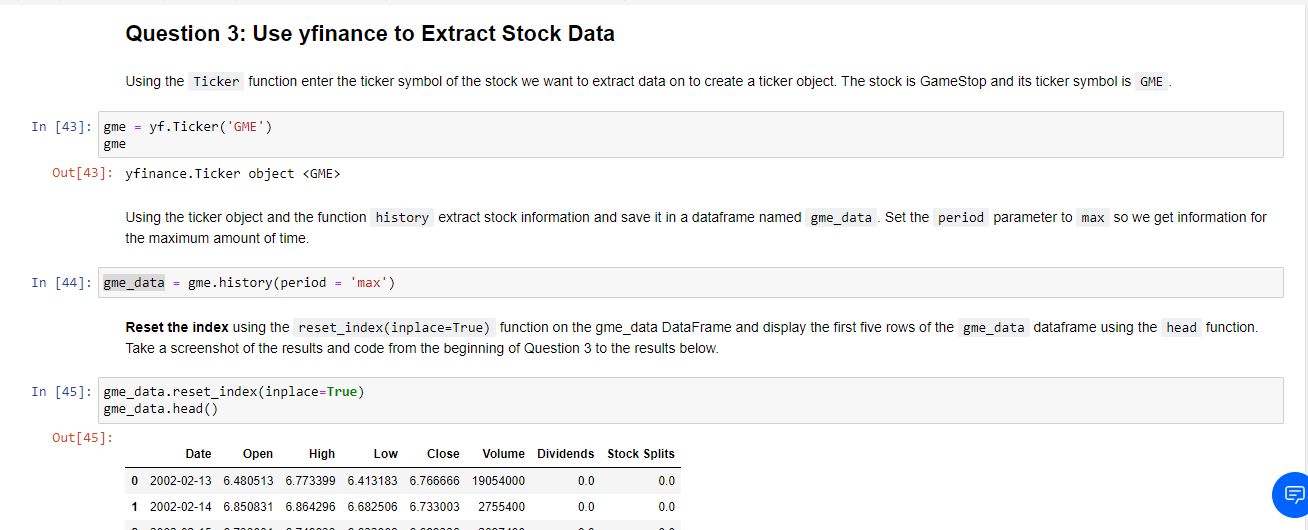

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [65]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [66]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [67]:
# Gamestop Annual Revenue (Millions of US $)

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue = gme_revenue.append({"Date":date, "Revenue": revenue}, ignore_index=True)
    
gme_revenue.head()

,Date,Revenue
0,2021-04-30,"$1,277"
1,2021-01-31,"$2,122"
2,2020-10-31,"$1,005"
3,2020-07-31,$942
4,2020-04-30,"$1,021"


In [68]:
# Gamestop Quarterly Revenue (Millions of US $)

read_html_pandas_data = pd.read_html(url)
gme_revenue = read_html_pandas_data[1]


gme_revenue.columns = ['Date', 'Revenue']

gme_revenue.head()

,Date,Revenue
0,2021-04-30,"$1,277"
1,2021-01-31,"$2,122"
2,2020-10-31,"$1,005"
3,2020-07-31,$942
4,2020-04-30,"$1,021"


In [58]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.head()

<ipython-input-58-5f68c50c0247>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
0,2021-04-30,1277
1,2021-01-31,2122
2,2020-10-31,1005
3,2020-07-31,942
4,2020-04-30,1021


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [59]:
gme_revenue.tail()

,Date,Revenue
61,2006-01-31,1667
62,2005-10-31,534
63,2005-07-31,416
64,2005-04-30,475
65,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [60]:
make_graph(tesla_data,tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [62]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
